# Problem Statement

**In Algerian dataset , considering the classes as dependent variable and rest of all Independent varibales, Need to predict the temperatues based on other Independent varibales which are shown in below**

* **Day** :  * **Month**: * **Year**: (DD/MM/YYYY) Day, month ('june' to 'september') , year (2012) Weather data observations
* **Temperature**: temperature noon (temperature max) in Celsius degrees: 22 to 42
* **RH**:   Relative Humidity in %: 21 to 90
* **WS**:   Wind speed in km/h: 6 to 29
* **Rain**: Total day in mm: 0 to 16.8
* **FFMC**: Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
* **DMC**:  Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
* **DC**:   Drought Code (DC) index from the FWI system: 7 to 220.4
* **ISI**:  Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
* **BUI**:  Buildup Index (BUI) index from the FWI system: 1.1 to 68
* **FWI**:   Fire Weather Index (FWI) Index: 0 to 31.1
* **CLASSES**:Classes: two classes, namely "fire" and "not fire"
* **region**: it provides the s2 pecified region namely  Bejaia and Sidi-Bel Abbes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# importing data skipping unnecessary rows and adding a seperate column based on the area of forest fires Bejaia and sidi-Bel as column names
# Bejaia Region Dataset- Bejaia, Sidi-Bel Abbes Region Dataset- Sedi-bel 


data=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", skiprows=[0,124,125,126], index_col=None)

In [3]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [4]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

** cloumn name has spaces after its so need to trim off those space**

In [5]:
data.rename(columns={'Classes  ':'Classes'},inplace=True)

In [6]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [7]:
data.dtypes

day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
Classes         object
dtype: object

There 2 columns "DC" and "FWI" are in object types , need to convert those to float64
    **DC --Drought Code (DC) index from the FWI system: and  FWI--Fire Weather Index (FWI) Index: 0 to 31.1 have data type as objects both of them need to be converted into Numerical features as the data inside resembles numerical data**

In [8]:
# convering FWI and "DC " to floating point variables

## converting DC and FWI to nemerical feature

# we have observed a "14.6 9" in DC and fire in FWI in the same row we are going to drop this line.

data.drop(data[data['DC'] =='14.6 9'].index, inplace = True)

data[['DC','FWI']] = data[['DC','FWI']].astype(str).astype(float)

In [9]:
data.dtypes

day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [10]:
# finding out null values in the data 
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [11]:
# finding out zero values in the data
data.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [12]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [13]:
# Trimming off spaces before and after the column names
data.rename(columns={ ' RH':'RH',' Ws':'Ws','Rain ':'Rain'},inplace=True)

In [14]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [15]:
# checking the zero values in the data 

(data['Rain']==0).sum()

133

In [16]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [17]:
data.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521


In [18]:
(data.corr()>0.95).sum()

day            1
month          1
year           0
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            2
DC             1
ISI            1
BUI            2
FWI            1
dtype: int64

**BUI and DMC has correlatio of 0.9822 , so we can eliminate anyone of this**

In [19]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


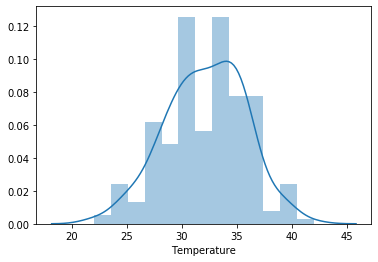

In [20]:
sns.distplot(data['Temperature'])

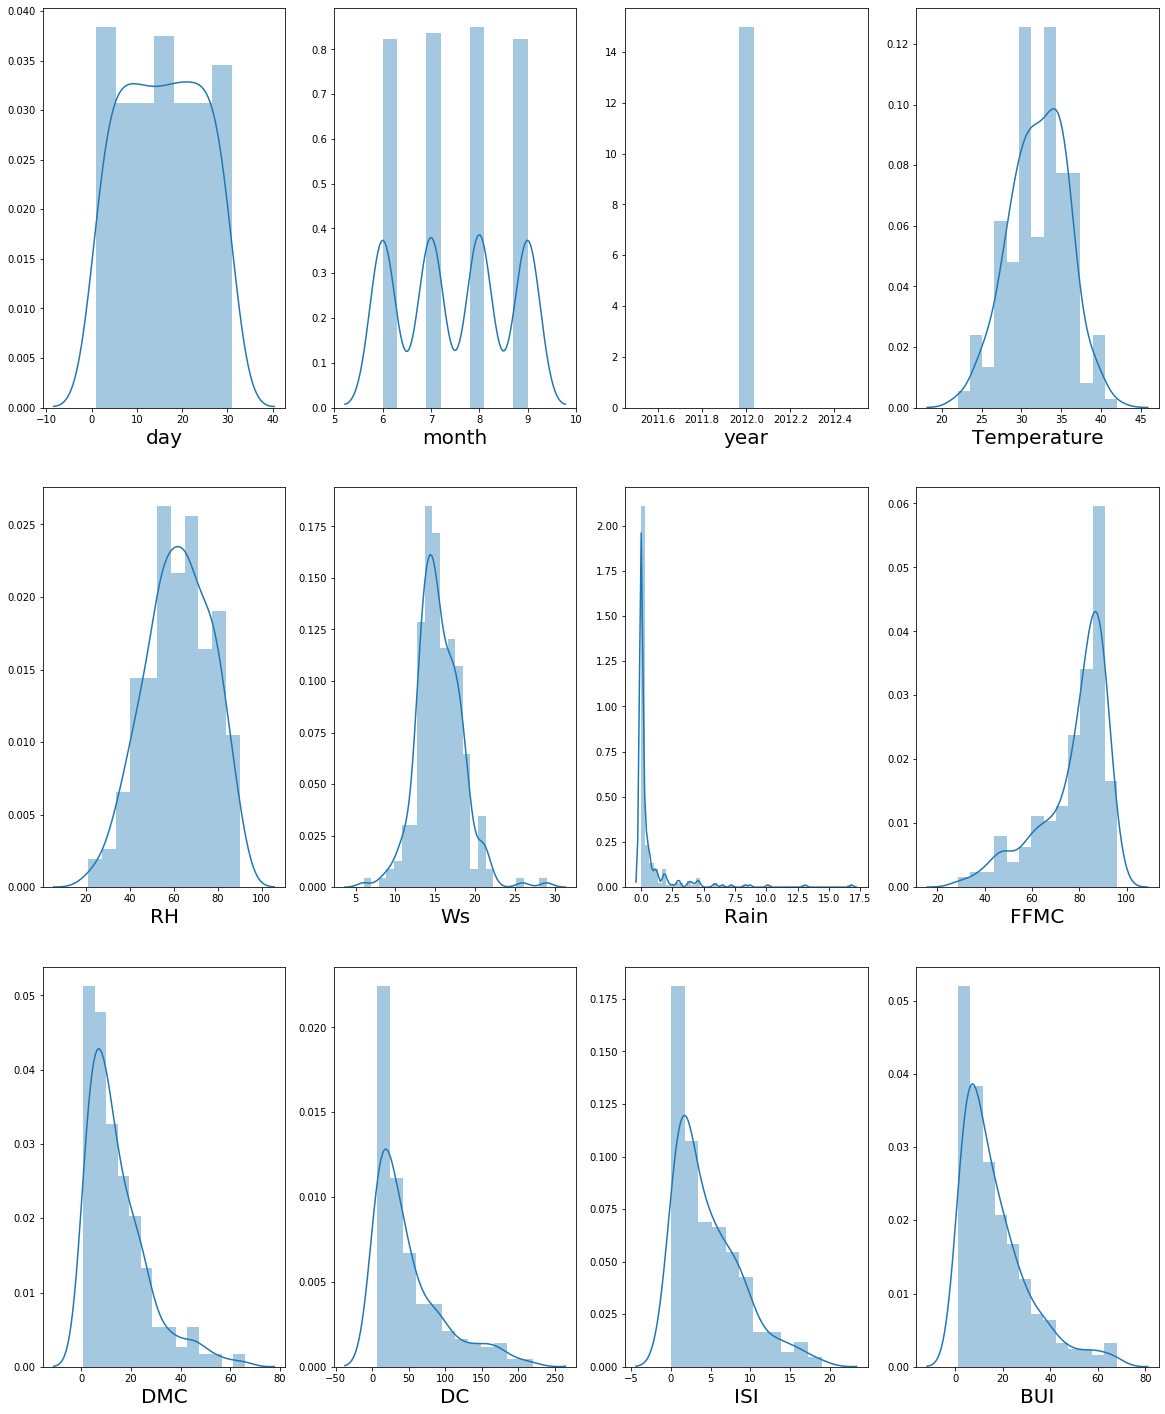

In [21]:
plotnumber=1
plt.figure(figsize=(20,25),facecolor='white')
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


**Droping year column in the data as the year is same for all the observations**

In [22]:
data_new=data.drop(columns='year')

In [23]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


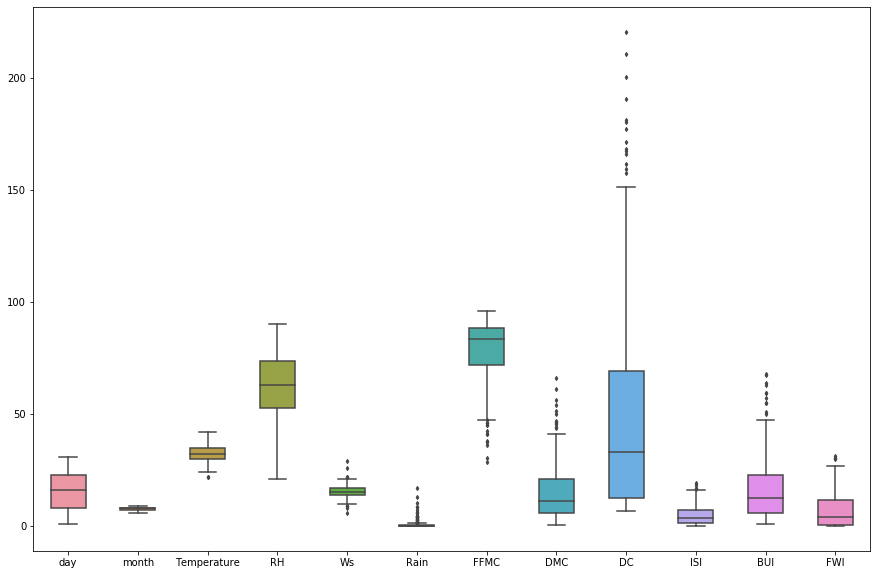

In [24]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data_new,width=0.5, ax=ax,fliersize=3)


**Outerliers are observed in Ws, Rain,FFMC, DM DC ISI BUI FWI**, in DC we have observed more outliers all this are very important in case of prediction of raining

In [25]:
data_new.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [26]:
data_new['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

**Trimming off extra spaces before and after the fire and not fire**

In [27]:
# using strip function for trim off the spaces

data_new['Classes']=data_new['Classes'].str.strip()

In [28]:
data_new['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [34]:
# One Hot encoding for the fire and not fire using Skykit learn libraary

from sklearn.preprocessing import OneHotEncoder

# converting the data type columns to category

#data_new['Classes']=data_new['Classes'].astype('category')

#Assigning numerical values and storing it in another columns
data_new['Classes_new']=data_new['Classes'].cat.codes

#Create an instance of One-hot-encoder
enc=OneHotEncoder()


'''NOTE: we have converted the enc.fit_transform() method to array because the fit_transform method 
of OneHotEncoder returns SpiPy sparse matrix this enables us to save space when we 
have huge  number of categorical variables'''

enc_data=pd.DataFrame(enc.fit_transform(data_new[['Classes_new']]).toarray())
  
#Merge with main
data_new=data_new.join(enc_data)
    

#### one hot encoding is done and the new classes_new variable created with values "1" and "0" to 

**1--- Indicates the "not fire" results**

**0--- indicates the "fire" in that region**

In [36]:
data_new

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Classes_new,0,1
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1,0.0,1.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1,0.0,1.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1,0.0,1.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1,0.0,1.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,0,0.0,1.0
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1,0.0,1.0
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1,0.0,1.0
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1,0.0,1.0


In [37]:
data_new.dtypes

day               int64
month             int64
Temperature       int64
RH                int64
Ws                int64
Rain            float64
FFMC            float64
DMC             float64
DC              float64
ISI             float64
BUI             float64
FWI             float64
Classes        category
Classes_new        int8
0               float64
1               float64
dtype: object

**Assigning the independent and dependent Variables**


In [44]:
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [51]:
# X data can be assigning the data varibales by droping the columns "Classes", "0", "1"
X = data.drop(columns = ['Classes','year'])
Y=data_new['Classes_new']

In [52]:
X

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [53]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
239    0
240    1
241    1
242    1
243    1
Name: Classes_new, Length: 243, dtype: int8

Before we fit our data to a model, let's visualize the relationship between our independent variables and the categories.

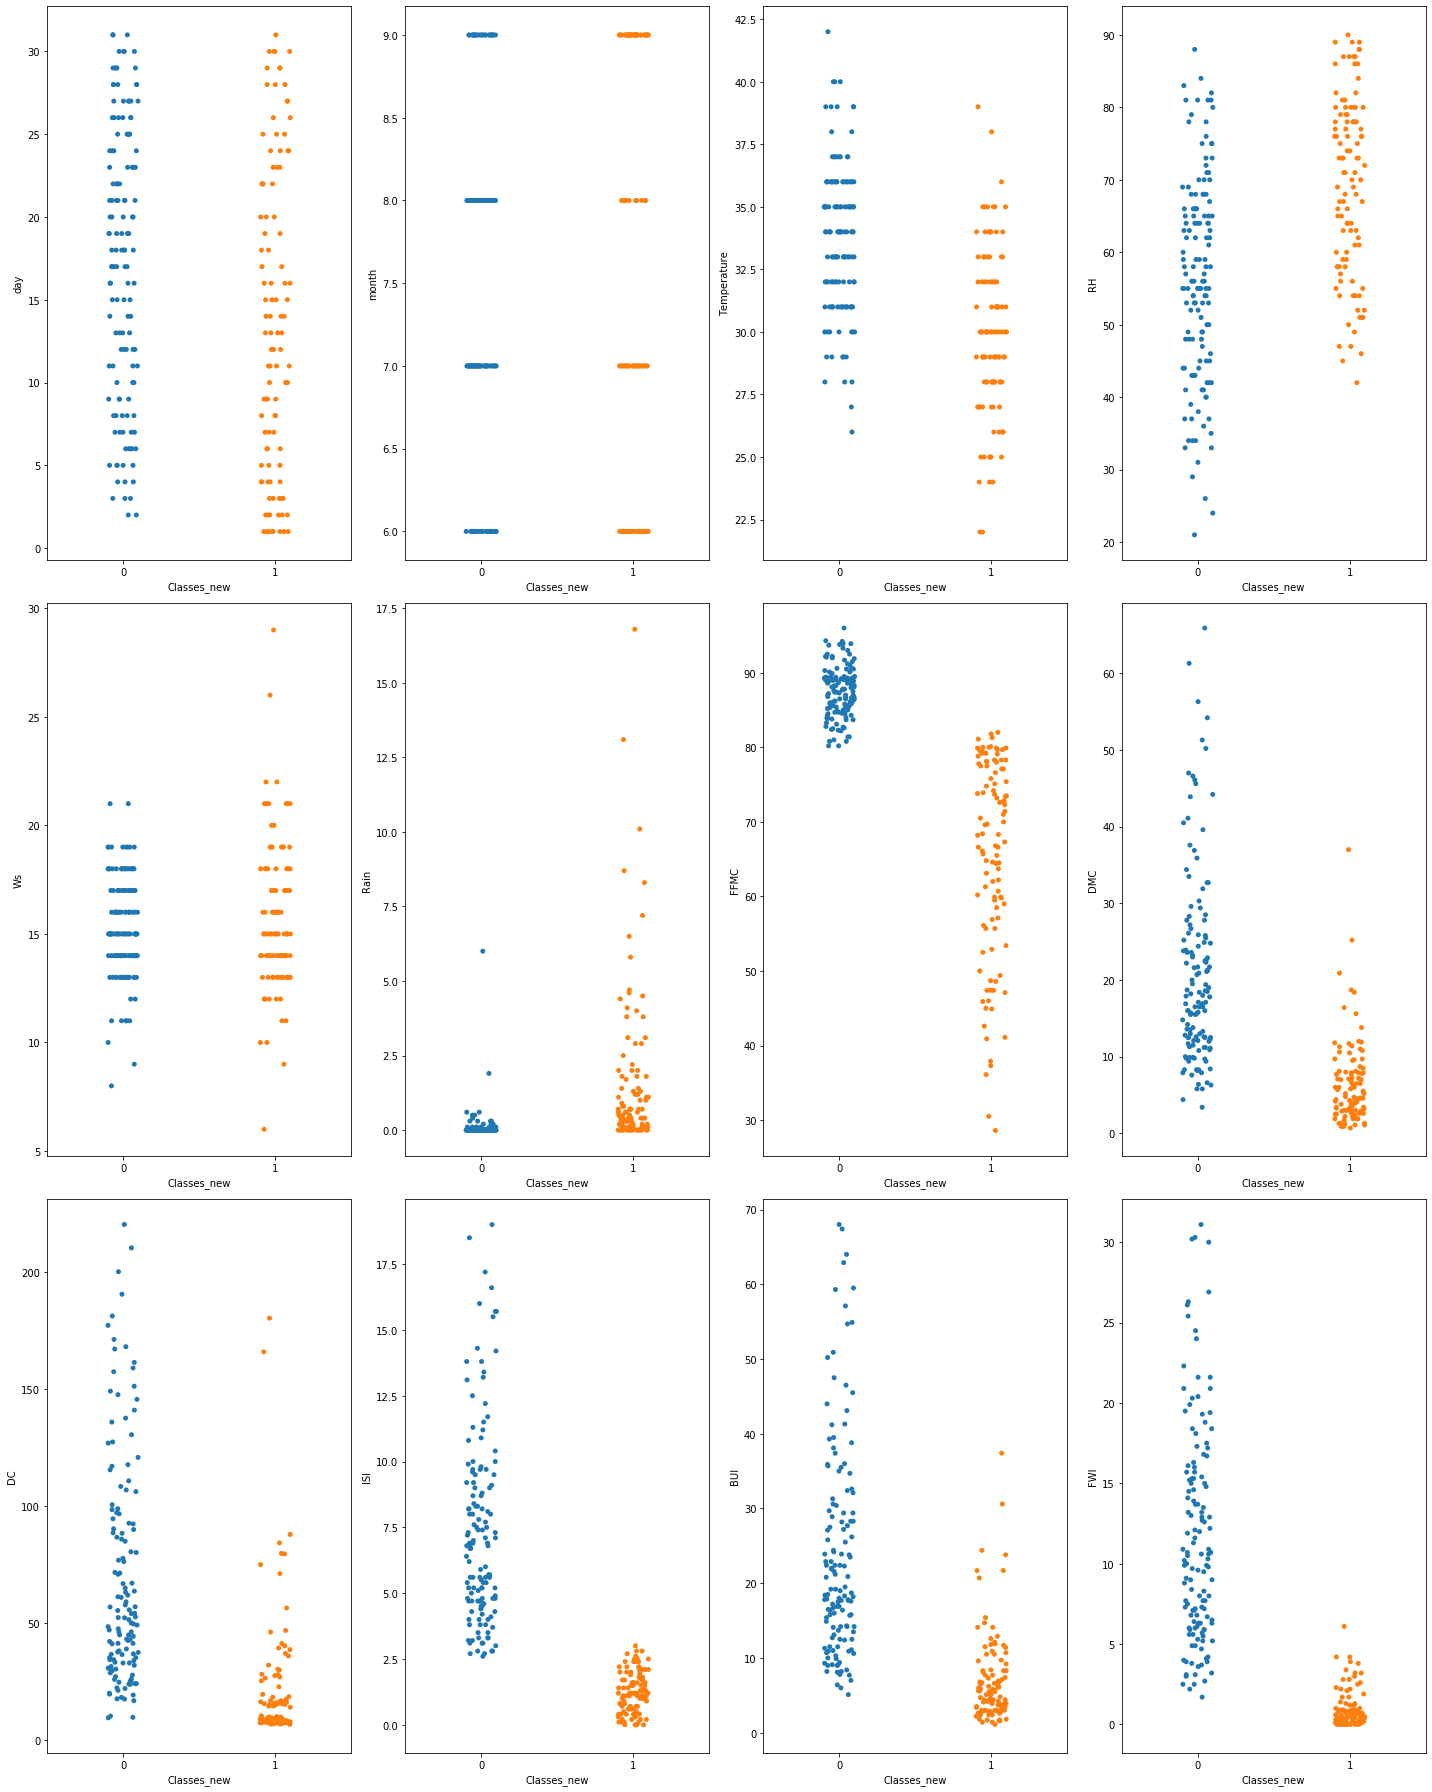

In [56]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber = 1
for column in X:
    if plotnumber<=15:
        ax=plt.subplot(3,4,plotnumber)
        sns.stripplot(Y,X[column])
        plotnumber+=1
plt.tight_layout()

### SPLITING the train and test data

In [58]:
from sklearn.model_selection import train_test_split

In [82]:
X_Train, X_Test, Y_Train, Y_Test= train_test_split(X,Y, test_size=0.3 ,random_state=40) 

In [83]:
X_Train

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
186,4,8,38,35,15,0.0,93.8,23.0,42.7,15.7,22.9,20.9
169,18,7,33,68,15,0.0,86.1,23.9,51.6,5.2,23.9,9.1
64,4,8,34,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9
127,6,6,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1
231,18,9,36,33,13,0.1,90.6,25.8,77.8,9.0,28.2,15.4
...,...,...,...,...,...,...,...,...,...,...,...,...
185,3,8,39,33,17,0.0,93.7,17.1,32.1,17.2,16.9,19.5
166,15,7,34,45,17,0.0,90.5,18.0,24.1,10.9,17.7,14.1
7,8,6,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1
220,7,9,31,62,15,0.0,83.3,5.8,17.7,3.8,6.4,3.2


In [84]:
X_Train.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
186,4,8,38,35,15,0.0,93.8,23.0,42.7,15.7,22.9,20.9
169,18,7,33,68,15,0.0,86.1,23.9,51.6,5.2,23.9,9.1
64,4,8,34,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9
127,6,6,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1
231,18,9,36,33,13,0.1,90.6,25.8,77.8,9.0,28.2,15.4


In [85]:
Y_Train.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [86]:
Y_Test.values

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1], dtype=int8)

In [80]:
X_Train.shape

(170, 12)

In [81]:
Y_Train.shape

(170,)

In [88]:
# fittng the model into logostic Regression

from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()

log_reg.fit(X_Train, Y_Train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
Y_Pred=log_reg.predict(X_Test)

In [90]:
Y_Pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1], dtype=int8)

In [99]:
# finding out Accuracy and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(Y_test,Y_Pred)
conf_matrix=confusion_matrix(Y_test,Y_Pred)
print("Accuracy= ", accuracy)
print("\n Confusion MAtrix: \n ",conf_matrix)

Accuracy=  0.958904109589041

 Confusion MAtrix: 
  [[42  1]
 [ 2 28]]


In [101]:
true_positive = conf_matrix[0][0]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]
true_negative = conf_matrix[1][1]

In [102]:
# Braking Down the formulae for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.958904109589041

In [104]:
# finding out Precision
Precision = true_positive/(true_positive+false_positive)
Precision

0.9767441860465116

In [105]:
# finding out recall for the 
Recall = true_positive/(true_positive+false_negative)
Recall

0.9545454545454546

In [106]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9655172413793104

In [111]:
from sklearn.metrics import roc_auc_score
# Area Under Curve
auc = roc_auc_score(Y_Test, Y_Pred)
auc

0.9550387596899225

### ROC

In [114]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_Test, Y_Pred)

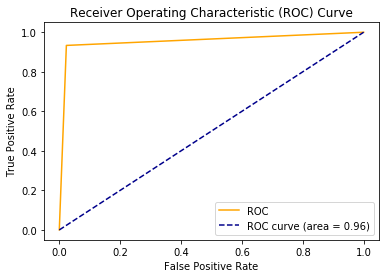

In [115]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()